# How to do Machine Learning with [Scikit-Learn](http://scikit-learn.org/stable/index.html)

## What you Need
For each model, we will need a feautures matrix ([num_samples, num_features]) and a target array ([num_samples, num_targets]). You can think of features as the $x_{i}$'s and the targets as the y (in the case of a simple x, y system). There are some caveats to the data prepartion though. It may also make sense to normalize or standarize your data, since many algorithms will calculate the distance between points, values on different scales can skew the results (think one feature bounded by 0 and 1 and the other bounded by 0 to infinity). 

## Scikit-Learn
Scikit-Learn has been built with ease-of-use in mind. Everything is consistently named and has good documentation; is easy to build pipelines and more complex algorithms out of he building blocks; and sensible defaults are provided to all algorithms, so you won't have crazy behavior if you are just testing something out to get a feel for it.

### Basic Steps for Implementation
1. Pick the type of model and import it from the appropriate module (i.e. `from sklearn.linear_model import LinearRegression`)
2. Instantiate the model with the appropriate hyperparameters (i.e. whether or not to include an intercept, how many iterations to train on, etc.).
3. Prep the data into the features matrix and target array discussed earlier. Depending on your use case, it may make more sense to split the data into a test set and a train test; doing so will help avoid overfitting. This can be achieved by:
`x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_data, y_data, test_size = 0.2)` ([More information on the train/test data split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)) This step will also include your preprocessing of the data, such as:
    - Should the data be standardized? ([sklearn.preprocessing.StandardScaler()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler))
    - Do you want to engineer some additional features?
    - Do you need one-hot encoding? ([sklearn.preprocessing.OneHotEncoder()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder))
    - Is there missing data? ([`sklearn.preprocessing.Imputer()`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html#sklearn.preprocessing.Imputer))
    - etc. Note that the above can be combined in pipelines ([`sklearn.pipeline.make_pipeline()`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline))
4. Fit the model to the data (i.e. run the `fit()` method on the model object). Important information about the resulting model will be available as attributes with _ after their names (i.e. `model.coef_` and `model.intercept_` for linear regressions).
5. Use the `predict()` method of the model with unseen data to see how it performs or just provide predictions.

### Evaluating Models
The module `sklearn.metrics` has evaluation metrics such as accuracy for models. Below are some commonly used metrics for classification and regression.

#### Classification:
- `accuracy_score()` = sum of correctly classified over all classifications
- `classification_report()` = provides a summary report for the main classification metrics
- `confusion_matrix()` = shows how the predictions match up to the true values
- `f1_score()` = harmonic balance between precision and recall
- `fbeta_score()` = variant of the F1-score but lets you specify the beta so you can favor precision or recall over the other.
- `precision_score()` = percentage of true positives over all flagged positives (true positives and false positives)
- `recall_score()` = percentage of true positives over all acutal positives (true positives and false negatives)
- `roc_auc_score()` = compute area under the ROC curve
- `roc_curve()` = curve showing true positive rate vs. false positive rate where the goal is to maximize the area under the curve

#### Regression:
- `mean_squared_error()`
- `r2_score()`

### Some Examples
#### Linear Regression
*Note that logistic regression is it's own class like Lasso (L1) and Ridge (L2) while polynomial regression is handled with the preprocessing step (see also: [sklearn.linear_model](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)).*

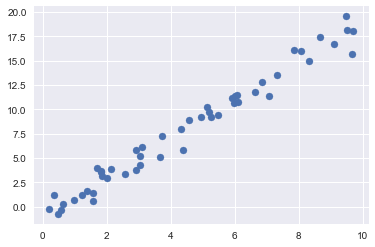

In [7]:
# sample data for linear regression
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

The coefficient on x is: [1.9776566]
The intecept is: -0.9033107255311092


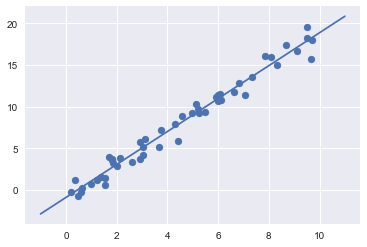

In [9]:
# fit linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
feature_matrix = x[:, np.newaxis] # we need to shape this as a matrix
target_array = y # no transformation needed for this one

model.fit(feature_matrix, target_array)

# check the resulting model
print('The coefficient on x is: ' + str(model.coef_))
print('The intecept is: ' + str(model.intercept_))

# predict new values
new_x = np.linspace(-1, 11)
new_data = new_x[:, np.newaxis]
predicted_y = model.predict(new_data)

# visualize results
plt.scatter(x, y)
plt.plot(new_x, predicted_y)

#### Dimensionality Reduction with PCA

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


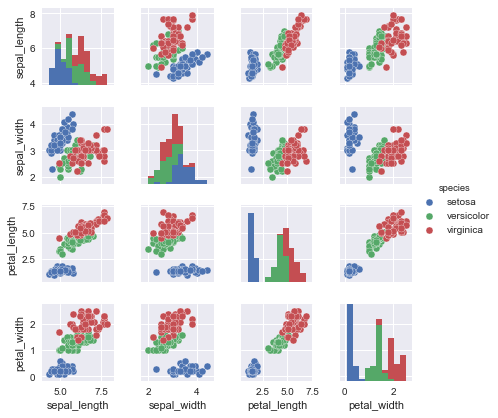

In [2]:
# load sample data and look at correlation between features; the species column is our target
%matplotlib inline
import seaborn as sns
sns.set()
iris = sns.load_dataset('iris')
print(iris.head())
sns.pairplot(iris, hue='species', size=1.5)

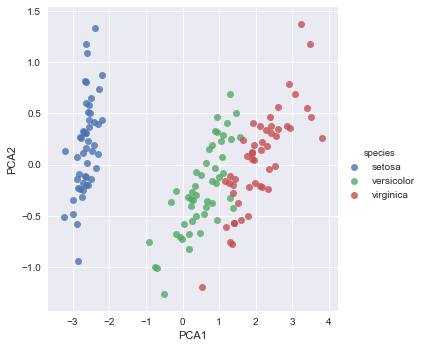

In [10]:
# divide the features and target data for use with sklearn
x_iris = iris.drop('species', axis=1) # axis=1 means drop the column
y_iris = iris['species'] # we only want what we dropped from x

# perform PCA
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(x_iris)
x_transformed = model.transform(x_iris)

# quick plot by inserting into the original df
iris['PCA1'] = x_transformed[:,0]
iris['PCA2'] = x_transformed[:,1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

#### Working with Data from Scikit-learn -- Recognizing Handwritten Digits

In [11]:
# use data from sklearn 
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


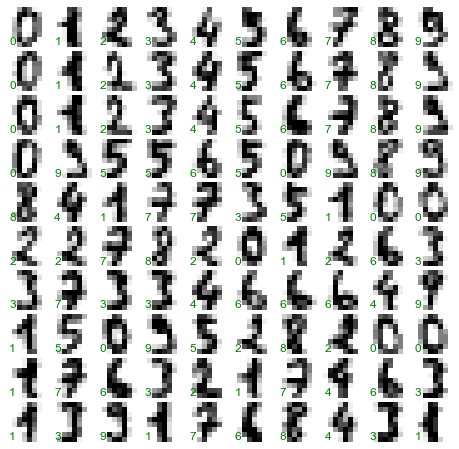

In [12]:
# visualize the data we are working with
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks' : [], 'yticks' : []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [13]:
# the x data above was in an [8 x 8] matrix but we need it to be a feature matrix [num_samples x 64] -- flattened out which we have in digits.data
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


##### Isomap (Dimensionality Reduction)

(1797, 2)


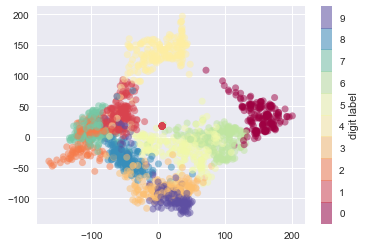

In [17]:
# Reduce dimensionality from 64D to 2D using Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
print(data_projected.shape) # data is 2D now

# plot data
plt.scatter(data_projected[:,0], data_projected[:, 1], c=y, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

##### Gaussian Naive Bayes
It's called "naive" because you make simplifying and often "naive" assumptions about the data. Here we are assuming the data is described by a Gaussian distribution with no covariance between dimensions. The decision boundary is usually quadratic. This method is very fast and doesn't require parameters making it a good choice for establishing a baseline model. This method can also be useful when the number of features becomes very large because the normality assumption becomes less detrimental.

*Note this method will produce classifications with the `predict()` method; however, if you want probabilities of the result being in each group, use `predict_proba()`*

In [18]:
# get baseline performance with Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # this has no parameters and is fast so it makes a good baseline

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # default test size will be 25%

model = GaussianNB()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

##### Model Evaluation Metrics

In [32]:
# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy = ' + str(round(accuracy_score(y_test, y_predicted)*100, 2)) + '%')
print(classification_report(y_test, y_predicted))

Accuracy = 85.33%
             precision    recall  f1-score   support

          0       0.98      0.96      0.97        53
          1       0.81      0.81      0.81        42
          2       0.93      0.66      0.77        41
          3       0.93      0.77      0.84        52
          4       0.93      0.91      0.92        47
          5       0.94      0.85      0.89        39
          6       0.96      1.00      0.98        43
          7       0.80      1.00      0.89        48
          8       0.51      0.95      0.67        37
          9       1.00      0.62      0.77        48

avg / total       0.89      0.85      0.86       450



##### The Confusion Matrix

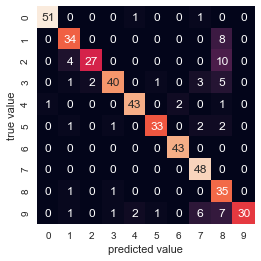

In [34]:
# show the confusion matrix
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

##### Visual Comparison of Right and Wrong Classifications

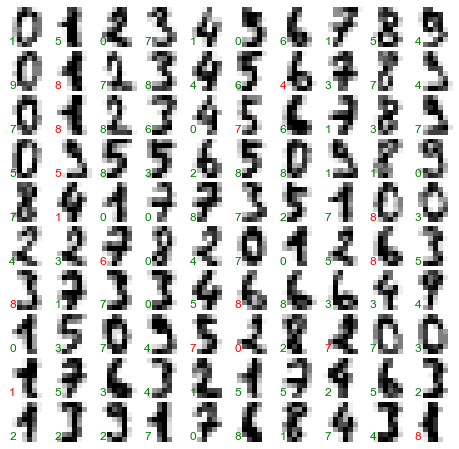

In [30]:
# plot the correct labels in green text and the wrong ones in red for some sample handwritten digits
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks' : [], 'yticks' : []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_predicted[i]), transform=ax.transAxes,
           color='green' if y_test[i] == y_predicted[i] else 'red')

### Cross-Validation
In order to make sure that your results aren't just due to how the data was split, it is recommended to perform your modeling with cross-validation. Scikit-learn makes it easy to do; just provide your instantiated (but not trained) model to these:
- [`sklearn.model_selection.cross_validate()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) = preforms cross-validation with desired number of folds and provides scores and fit times
- [`sklearn.model_selection.cross_val_score()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) = performs cross-validation as above but only returns the scores for a particular metric
- [`sklearn.model_selection.cross_val_predict()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict) = performs the cross-validation as above, but only returns the predicted values

### Other Techniques to Explore when Tuning Parameters and Picking Models
- [`sklearn.model_selection.validation_curve()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve) = show the tradeoff between higher complexity models (high-variance) and lower complexity models (high bias); high-variance is commonly an overfit and high-bias an underfit
- [`sklearn.model_selection.learning_curve()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) = the optimal model will depend on the size of your training data; the learning curve is a plot of training/validation score (above) with respect to the size of the training set
- [`sklearn.model_selection.GridSearchCV()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) = search through to find the best hyperparameters from the testing options provided in a dictionary; as with models, need to instantiate and then use the `fit()` method; other methods can then be used to access the results
- [`sklearn.model_selection.RandomizedSearchCV()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) = randomized version of above

### Pipelines
[Pipelines](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) make it easy to chain together operations like feature engineering, data cleaning, and model selection. For example:
```
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
                      
model.fit(x, y)
```

### Notes
- Utility methods, like resampling for bootstrap methods, can be found at [sklearn.utils](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.utils)
- Most algorithms can be found in a module of their category name:
    - [sklearn.neural_network](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network)
    - [sklearn.cluster](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)
    - [sklearn.linear_model](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
    - [sklearn.tree](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
    - [sklearn.svm](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
    - [sklearn.neighbors](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
    - [sklearn.naive_bayes](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
    - [sklearn.ensemble](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), i.e. gradient boosting and random forest
- [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction) and [sklearn.feature_selection](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) include classes and methods for building out more complex models.
- Linear regressions don't output significance level like in R. You can try something like this `scores, pvalues = chi2(X, y)` or look to the `statsmodels` package instead.

### Resources
- [Scikit-Learn Documentation Home](http://scikit-learn.org/stable/index.html)
- [Scikit-Learn Classes](http://scikit-learn.org/stable/modules/classes.html)
- [Scikit-Learn Data Preprocessing](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- [Scikit-Learn Examples](http://scikit-learn.org/stable/auto_examples/index.html)
- [Scikit-Learn User Guide](http://scikit-learn.org/stable/user_guide.html)
    1. [Supervised Learning (Classification & Regression)](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
    2. [Unsupervised Learning (Clustering and other Methods)](http://scikit-learn.org/stable/unsupervised_learning.html)
    3. [Model Selection](http://scikit-learn.org/stable/model_selection.html#model-selection)
    4. [Dataset Transformations](http://scikit-learn.org/stable/data_transforms.html)
    5. [Toy Datasets for Help Getting Started](http://scikit-learn.org/stable/datasets/index.html)
    6. [Optimization Strategies for Large Datasets](http://scikit-learn.org/stable/modules/scaling_strategies.html)
    7. [Computational Performance](http://scikit-learn.org/stable/modules/computational_performance.html)